<table align="left" style="border-style: hidden" class="table"> <tr> <td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2018</h4><p>Ani Adhikari</div></td></tr></table><!-- not in pdf -->

In [1]:
# SETUP

import numpy as np
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', DeprecationWarning)


# Useful for probability calculations
from scipy import stats
from scipy import misc

# Imports for interactive widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Lab 3: Total Variation #
Poisson distributions are often used as approximations to distributions of counts of rare events. In particular, the Poisson $(1)$ distribution can be used to approximate the distribution of a random count that has 1 as its most likely value.

In class we studied two situations in which probabilities converge to those in a Poisson distribution. One was binomial probabilities for large $n$ and small $p$, and the other was the probability of a specified number of matches in the matching problem.

In this lab we will look at the entire binomial $(n, 1/n)$ distribution as well as the exact distribution of the number of matches, and compare them with their Poisson $(1)$ approximations. We will make the comparisons visually and also by a numerical measure of the distance between two distributions. In doing so we will find an upper bound for the amount of error in probability calculations when we approximate one distribution by another.

What you will learn:
- The definition of total variation distance (TVD) and its interpretation in terms of the amount of error in approximating probabilities
- Properties of the TVD between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions as $n$ gets large
- The computation of the exact distribution of the number of fixed points (matches) of a random permutation
- Properties of the TVD between the distribution of the number of matches and the Poisson $(1)$ distribution

## Part 1: Total Variation Distance ##

Suppose you have two probability distributions on the same set of possible values $x_1, x_2, \ldots , x_n$. Let the two distributions be $b_1, b_2, \ldots, b_n$ and $g_1, g_2, \ldots, g_n$, where for each $i$ the $b$-distribution assigns probability $b_i$ to the value $x_i$ and the $g$-distribution assigns probability $g_i$.

The *total variation distance* between the two distributions is defined by

$$
tvd(b, g) = 
\frac{1}{2} \sum_{i=1}^n |b_i - g_i| 
$$

The choice of notation comes from the blue and gold colors you will see in overlaid histograms below.

### 1a) Visualization ###
Run the cell to display a histogram of the binomial $(10, 1/10)$ distribution. Notice how the probabilities are concentrated on the low values. This is a signal to start thinking about Poisson approximations, even though the number of trials $n = 10$ isn't very large.

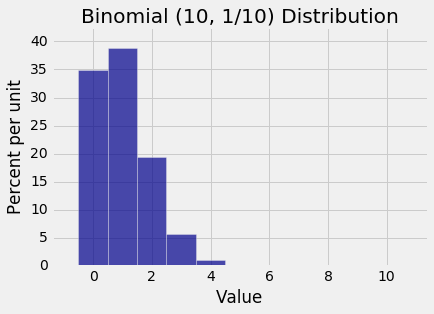

In [2]:
n = 10                                    # number of trials

k = range(n+1)                            # possible values
binom_probs = stats.binom.pmf(k, n, 1/n)  # probabilities

# Create a distribution object
binom_dist = Table().values(k).probability(binom_probs)

# Visualize
Plot(binom_dist)
plt.title('Binomial (10, 1/10) Distribution');

Roughly stated, a theorem we proved in class says that if $n$ is large and $p$ is small, then the binomial $(n, p)$ probabilities look like Poisson $(np)$ probabilities. Even though 10 isn't very large, compare the binomial $(10, 1/10)$ and Poisson $(1)$ distributions. Run the cell below to display the Poisson $(1)$ histogram.

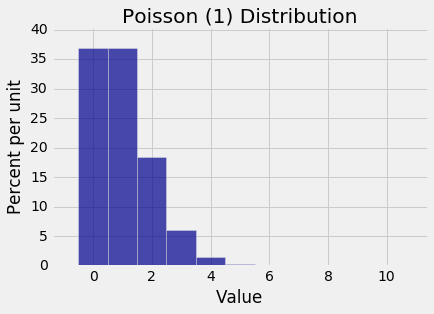

In [3]:
poisson_1_probs = stats.poisson.pmf(k, 1)
poisson_1_dist = Table().values(k).probability(poisson_1_probs)
Plot(poisson_1_dist)
plt.title('Poisson (1) Distribution');

This is the fundamental distribution of this lab, so take a good look at it. Notice the two modes, at 0 and 1. Notice also that even though the possible values are all the non-negative integers, virtually all the probability is concentrated in the 0 through 5 range.

The binomial $(10, 1/10)$ and Poisson $(1)$ distributions do resemble each other but not very closely. Run the cell below to draw overlaid histograms.

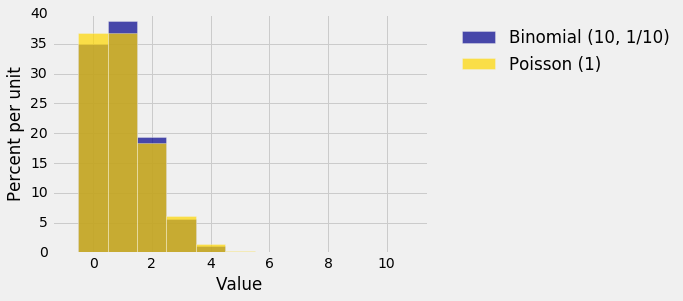

In [4]:
Plots('Binomial (10, 1/10)', binom_dist, 'Poisson (1)', poisson_1_dist)

The total variation distance between the two distributions is the total amount by which the areas of the blue bars exceed those of the corresponding gold bars. That's exactly equal to the total amount by which the gold bars exceed the blue.

This is almost apparent from the definition of total variation distance, and you will prove it in homework. Just assume it for now as you did in Data 8. It's an intuitively reasonable measure of the difference between two distributions.

### 1b) Computing TVD ###
Define a function `tvd` that takes two arrays and returns the total variation distance between them. It's fine to assume that both of the input arrays are probability distributions; you don't have to include code to check that they are non-negative and each sums to 1.

In [ ]:

def tvd(b, g):
    return ...

When the two arrays are $b = [0.4, 0.3, 0.2, 0.1]$ and $g = [0.25, 0.25, 0.25, 0.25]$, the histograms look like this:

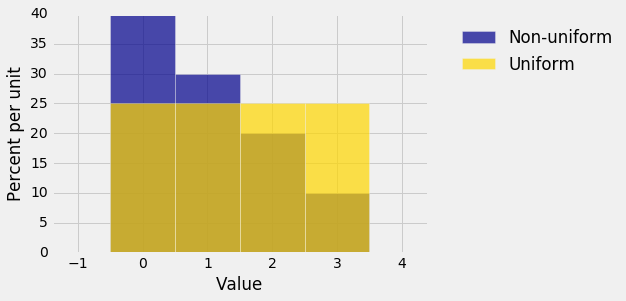

In [6]:
b = make_array(0.4, 0.3, 0.2, 0.1)
g = make_array(0.25, 0.25, 0.25, 0.25)
k = np.arange(4)
blue_dist = Table().values(k).probability(b)
gold_dist = Table().values(k).probability(g)
Plots('Non-uniform', blue_dist, 'Uniform', gold_dist)

Calculate the TVD mentally. Then run the cell below to confirm that your function `tvd` is working correctly.

In [ ]:
tvd(make_array(0.4, 0.3, 0.2, 0.1), make_array(0.25, 0.25, 0.25, 0.25))

### 1c) Another Way of Interpreting TVD ###
Thus far, our interpretation of total variation distance has been essentially geometric: the amount by which the blue bars exceed the gold. There is an equivalent interpretation in terms of probabilities that makes it easier to understand what the numerical value of the distance is telling us.

Suppose you have a finite set of possible values, and a choice of two probability distributions to use for finding probabilities. For example, the choices might be the exact distribution of a random variable and an approximate distribution. 

**The total variation distance between the two distributions is the biggest difference you can possibly get if you compute the probability of an event using each of the two distributions.**

Formally, if $S$ is the space of all possible values, then the total variation distance between the blue and gold distributions is equal to

$$
\max\{ \big{\lvert} P_{blue}(A) - P_{gold}(A) \big{\rvert} : A \subseteq S\}
$$

This can be shown in a few straightforward steps and you will do that in homework. For this lab, just accept it and think about the TVD as follows.

Suppose you want to approximate the binomial $(1000, 0.0025)$ distribution by a Poisson distribution. Which Poisson distribution will you use? Create two numpy arrays (using functions from the `stats` package) representing the Binomial (1000, 0.0025) distribution and your chosen Poisson distribution. Once you have decided that, use your function `tvd` to compute the total variation distance between the two distributions. 

**Note:** Don't worry that the Poisson distribution has an infinite set of possible values and the values of the binomial distribution only go up to 1000. Just restrict the Poisson to go up to 1000 and no further. You know that when $p$ is small, the Binomial $(n, p)$ distribution and its Poisson approximation only have a few bars with any significant probability, and they're all at the low end of the possible values.

In [ ]:
binom_probs = ...
poisson_probs = ...
tvd(...)

### Interpretation ###
If $X$ has the binomial $(1000, 0.0025)$ distribution, and for some set $A$ you find $P(X \in A)$ using the Poisson approximation instead of the exact binomial distribution, then your approximation will be off by at most the TVD you have calculated.

Small TVD, small error. You knew that intuitively already, but now you can quantify it more sharply.

See what happens if you approximate the same binomial $(1000, 0.0025)$ probabilities by a different Poisson distribution than the one you chose. Run the cell below and drag the slider to the value of the Poisson parameter you chose above. Then, drag the slider to a slightly different parameter. See what happens to the TVD and hence to the amount of error in approximating probabilities.

In [ ]:
interact(lambda mu: print('tvd:', tvd(stats.binom.pmf(range(1001), 1000, 0.0025), stats.poisson.pmf(range(1001), mu))), 
         mu=widgets.FloatSlider(min=2., max=3., step=0.01, value=2.));

#newpage

## Part 2: The Binomial $(n, 1/n)$ Distribution ##
We proved in lecture that if $n \to \infty$ and $p_n \to 0$ so that $np_n \to \mu > 0$, then for each $k$ the binomial $(n, p_n)$ probability of $k$ converges to the Poisson $(\mu)$ probability of $k$.

Let $p_n = 1/n$ in the statement above. Then for each $k$, the binomial $(n, 1/n)$ probability of $k$ converges to the Poisson $(1)$ probability of $k$. 

In Part 1 of the lab you compared the binomial $(10, 1/10)$ distribution and the Poisson $(1)$ distribution. We will now extend that by comparing the binomial $(n, 1/n)$ distribution and the Poisson $(1)$ distribution using total variation distance.

### 2a) TVD between Binomial $(n, 1/n)$ and Poisson $(1)$ ###
Define a function `binomial_poisson_tvd` that takes $n$ as its argument and returns the total variation distance between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions. As before, it's fine to compute the Poisson $(1)$ probabilities only on 0 through $n$, the possible values of the binomial.

In [ ]:

def binomial_poisson_tvd(n):
    ...

As a check to see if your function is working correctly, run the cell below. The output should be about 1%.

In [ ]:
binomial_poisson_tvd(30)

### 2b) Visualization ###
Extend `tvd_table` below with a column labeled `'Binomial (n, 1/n)'` that contains the TVD between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions, where in each row $n$ is given by the entry in Column 0.

In [ ]:

tvd_table = Table().with_column('n', np.arange(5, 101))

tvds = tvd_table...

tvd_table = tvd_table...

tvd_table

Now draw a graph of the TVD as a function of $n$.

In [ ]:

...
plt.title('TVD between Binomial (n, 1/n) and Poisson (1)');

Notice how sharply the function drops. Fill in the blanks (the code cell below might help):

For $n$ about $\underline{~~~~~~~~~~~~~~~~}$ or more, Poisson $(1)$ approximations to binomial $(n, 1/n)$ probabilities will be off by at most 0.5%. 


**Your answer here**

In [14]:
tvd_table.where(1, are.between(0.0049, 0.0051))

n,"Binomial (n, 1/n)"
55,0.00507037
56,0.00497888


You can use total variation distance to help answer the question, "How large does $n$ have to be before I can use the Poisson $(1)$ approximation to the binomial $(n, 1/n)$ distribution?" 

- First decide how much error you are prepared to tolerate in your approximations. 
- Then use `tvd_table` (or an extended one with larger values of $n$) to find the smallest $n$ for which the TVD is below your threshold error. 
- For that $n$ or larger, the error in your Poisson $(1)$ probability approximations will be below your threshold.

#newpage

## Part 3: Fixed Points of a Random Permutation ##

Let $M_n$ be the number of fixed points in a random permutation of $1, 2, 3, \ldots, n$. You can think of $M_n$ as the number of matches when $n$ letters labeled 1 through $n$ are permuted randomly into $n$ envelopes labeled 1 through $n$.

[You know](https://textbook.prob140.org/notebooks-md/5_03_The_Matching_Problem.html) that the distribution of $M$ is given by 
$$
P(M_n = k) ~ = ~ 
\frac{1}{k!} \cdot \big{(} 1 - \frac{1}{1!} + \frac{1}{2!} - \frac{1}{3!} + \cdots (-1)^{n-k}\frac{1}{(n-k)!} \big{)} \\
$$
for $0 \le k \le n$.

If $n$ is large, you know that for each fixed $k$ we have the approximation 
$$
P(M_n = k) ~ \approx ~ \frac{e^{-1}}{k!}
$$ 

These are the terms in the Poisson $(1)$ distribution.

In this part of the lab you will compare the distribution of $M_n$ with its Poisson $(1)$ approximation, both visually and by studying the total variation distance between the two distributions.

### 3a) Computing $P(M_n = k)$ ###
Complete the function `prob_matches` defined below which takes $k$ and $n$ as its arguments and returns $P(M_n = k)$.

Use array operations. It is helpful that `misc.factorial(integer_array)` results in an array consisting of the factorials of all the integers in `integer_array`. The module `misc` has already been imported.

In [ ]:

def prob_matches(k, n):
    x_even = np.arange(0, n-k+1, 2)
    x_odd = np.arange(1, n-k+1, 2)
    
    
    return ...

To confirm that your function is working correctly, think about what $P(M_n = n-1)$ should be, and then run the cell below to check.

In [ ]:
prob_matches(99, 100)

For further confirmation, run the cell below to compare the output of the function to its Poisson $(1)$ approximation.

In [ ]:
prob_matches(5, 100), stats.poisson.pmf(5, 1)

Once you are confident your function works, run the following cell. As the Poisson approximation would predict, the two values should be close. Explain why the exact values are almost the same. (Hint: Think about how much they should differ by)

In [ ]:
prob_matches(0, 100), prob_matches(1, 100)


**Your answer here**

Run the cell below and explain what you see using the Poisson approximation.

In [ ]:
prob_matches(5, 100), prob_matches(5, 1000)


**Your answer here**

### 3b) The Distribution of $M_n$ ###
Use `prob_matches` to define a function `match_dist` that takes $n$ as its argument and returns an array consisting of the probabilities $P(M_n = k)$ for $0 \le k \le n$. 

In [ ]:
...

The expression `match_dist(100)[0:11]` evaluates to an array consisting of the elements 0 through 10 of `match_dist(100)`. Explain what the output of the cell below tells you about the distribution of $M_n$. As with most questions about random variables, start by thinking about the possible values of $M_n$.

In [ ]:
sum(match_dist(100)[0:11])


**Your answer here.**

What does the histogram below display? Which histogram in Part 1 does it resemble?

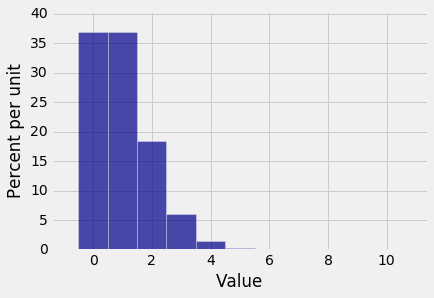

In [22]:
k = np.arange(11)
match_100 = match_dist(100)[0:11]
match_100_dist = Table().values(k).probability(match_100)
Plot(match_100_dist)


**Your answer here.**


### 3c) Total Variation Distance ###
Use the `stats` module and functions you have already defined in this lab to define a new function `matches_poisson_tvd` that takes $n$ as its argument and returns the total variation distance between the distribution of $M_n$ and the Poisson $(1)$ distribution.

In [ ]:

def matches_poisson_tvd(n):
    
    
    return ...

Extend `tvd_tables` defined in **2b** with a column labeled `'Matches (n)'` that contains the total variation distance between the exact distribution of the number of matches and its Poisson $(1)$ approximation. As before, in each row $n$ is given by the entry in Column 0.

In [ ]:
tvds = tvd_table...
...

Plot the two TVDs (binomial/Poisson and matching/Poisson) as functions of $n$ on the same graph.

In [ ]:
...

To see why the new plot falls so steeply, look back at the formula for $P(M_n = k)$ given at the beginning of this part of the lab. It's essentially the same as the Poisson $(1)$ probability function, except that the infinite sum of $e^{-1}$ has been replaced by a partial sum. For large $n$ and small $k$, there's not much difference between the two. For large $k$ the chance is close to 0 anyway.

Look at the table below for numerical confirmation of the steep drop.

In [26]:
tvd_table

n,"Binomial (n, 1/n)",Matches (n)
5,0.0622837,0.0341112
6,0.0509556,0.0100777
7,0.0430299,0.00258417
8,0.0372241,0.000585866
9,0.0327973,0.000119094
10,0.0293116,2.19485e-05
11,0.0264958,3.70026e-06
12,0.0241737,5.74911e-07
13,0.0222259,8.28377e-08
14,0.0205686,1.11286e-08


If $n \ge 10$ you might as well use the Poisson $(1)$ distribution for the number of matches.

## Conclusion ##
What you have learned in this lab:
- If you use an approximation to the distribution of $X$, then the total variation distance between the exact and approximate distributions measures the worst error you can make in approximating probabilities of events determined by $X$. You didn't prove that in the lab but you will for homeowrk.
- The total variation distance between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions falls sharply as a function of $n$ and is below 1% even for moderate values of $n$.
- The total variation distance between the distribution of the number of matches in a random permutation of $n$ elements and its Poisson $(1)$ approximation falls even more sharply. By about 10 elements or so, you might as well use the Poisson distribution for the number of matches.
- The random variables in this lab all have possible values 0 through $n$. That's a large number of possible values when $n$ is large, and the approximating Poisson distribution has infinitely many possible values. But no matter how large $n$ is, the *probable* values are in a very small range – 0 through about 8 or 10 – because all the distributions are roughly Poisson (1).

## Submission Instructions

1. **Save your notebook using File > Save and Checkpoint.**
2. Run the cell below to generate a pdf file.
3. Download the pdf file and confirm that none of your work is missing or cut off.
4. Submit the assignment to Lab_03b on Gradescope.

#### Logistics 

1. Examine the generated pdf before uploading to make sure that it contains all of your work.
2. When submitting to Gradescope, select the pages of your upload corresponding to each question. 
3. If you encounter any difficulties when submitting or exporting your assignment, please make a private Piazza post **before the deadline**. 

### **We will not grade assignments which do not have pages selected for each question or were submitted after the deadline.** 

In [ ]:
import gsExport
gsExport.generateSubmission("Lab_03.ipynb")